In [1]:
import base

In [2]:
import gym
from src.util import matrix_to_image
from time import sleep
from IPython import display

In [3]:
from src.downsamplers.downsampler import Downsampler

In [4]:
# A Breakout down-sampler with a modest crop, neither tight nor heavily padded
downsample_breakout = Downsampler(y=(32, 14), x=(8, 8), cut=[142])

In [5]:
env = gym.make('BreakoutDeterministic-v4')

In [6]:
env.reset()
initial_state = env.render(mode='rgb_array')

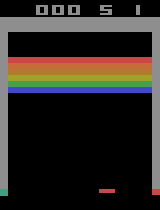

In [7]:
matrix_to_image(initial_state)

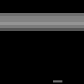

In [8]:
matrix_to_image(downsample_breakout(initial_state, (84, 84)))

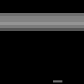

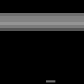

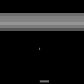

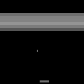

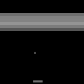

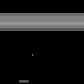

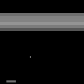

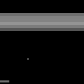

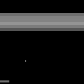

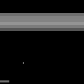

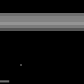

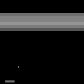

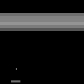

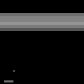

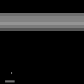

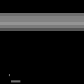

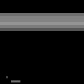

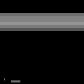

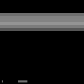

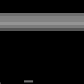

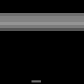

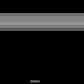

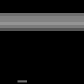

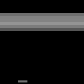

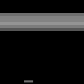

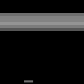

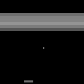

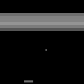

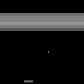

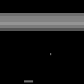

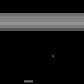

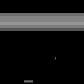

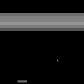

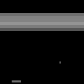

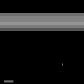

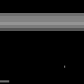

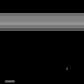

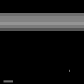

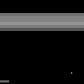

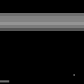

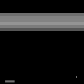

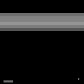

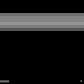

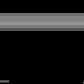

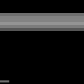

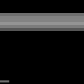

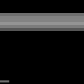

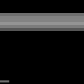

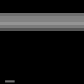

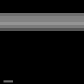

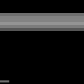

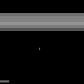

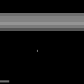

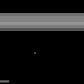

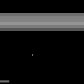

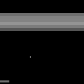

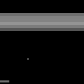

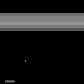

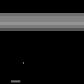

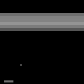

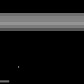

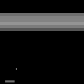

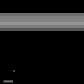

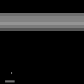

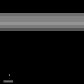

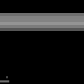

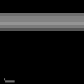

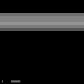

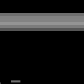

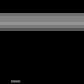

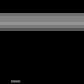

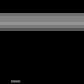

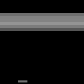

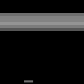

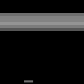

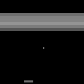

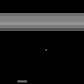

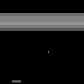

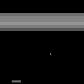

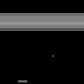

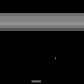

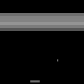

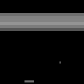

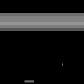

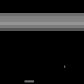

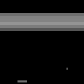

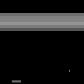

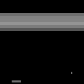

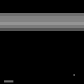

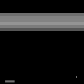

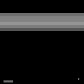

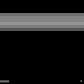

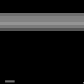

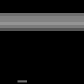

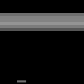

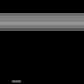

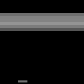

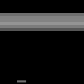

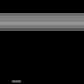

In [9]:
for _ in range(99):
    _, _, _, _ = env.step(action=env.action_space.sample())
    state = env.render('rgb_array')
    state = downsample_breakout(state, (84, 84))
    display.display(matrix_to_image(state))
    sleep(0.1)